<a href="https://colab.research.google.com/github/guiguilhermegui/Phy/blob/main/Chopper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeira Rodada

In [20]:
#configurar no simbolo de chave ao lado

#''' #comentário multilinha, apague com uma hashtag antes dos ,,,

from google.colab import userdata
token=userdata.get('token')
username=userdata.get('username')
email=userdata.get('email')
repo=userdata.get('repo')
pw=userdata.get('pw')

#'''


In [21]:
#Rodar só uma vez
%cd
!pip install pillow
!git config --global user.name username
!git config --global user.email email
!git config --global user.password pw





%cd Phy/
%ls

/root
[Errno 2] No such file or directory: 'Phy/'
/root


# Se precisar rodar de novo renomeia a pasta e roda este de baixo

In [22]:
%cd
%mkdir ../content/NewVersion
%cd /content/NewVersion

!git init
!git clone https://{token}@github.com/{username}/{repo}

/root
mkdir: cannot create directory ‘../content/NewVersion’: File exists
/content/NewVersion
Reinitialized existing Git repository in /content/NewVersion/.git/
fatal: destination path 'Phy' already exists and is not an empty directory.


 # Help cheat sheet

### trocar de pasta virtual colab




```
%mkdir ../content/NewVersion
%cd /content/NewVersion
%ls
```



### mover/editar pastas (cudado, mover significa excluir também)

#### opção 0, arquivo único na árvore de arquivos



  1. editar na interface do site


#### opção 1, edita offline, exclui e sobe


  1. fazer download da pasta,
  2. copia bck,
  3. edita,
  4. deletar no github, e depois
  5. subir de volta


#### opção 2 usar os comandos git

       




1. usar um dos comandos git abaixo,
2. testar com pasta de testes

 oi ( [procure ajuda](https://git-scm.com/docs/git-mv)) it is dangerous

 use o parâmetro --dry-run pra mostrar o que acontecereia


        git mv ./folder/* . --dry-run
        git mv folder/* . --dry-run
        git mv folder/.* . --dry-run

e depois de descobrir o comando correto   

        git rm ./my-app
        git add -A
        git commit -m "Folders moved out of my-app directory :)"



In [23]:
%cd Phy/Apps/Chopper/
%ls

/content/NewVersion/Phy/Apps/Chopper
aChopper.ipynb  Matlab/  Pillow/


### Download da pasta



    from google.colab import files
    #!zip -r /content/NewVersion.zip /content/NewVersion/
    #files.download('/content/NewVersion.zip')


### google drive connection






    from google.colab import drive
    #drive.mount('/content/drive')





# Início do código OpenCv


In [34]:
%cd /content/NewVersion/Phy/
%ls



/content/NewVersion/Phy
Apps/  Chopper.ipynb  Img/  LICENSE  README.md


In [33]:
!ls -la

total 32
drwxr-xr-x 4 root root  4096 Sep 24 14:46 .
drwxr-xr-x 5 root root  4096 Sep 24 14:46 ..
-rw-r--r-- 1 root root 14114 Sep 24 14:46 aChopper.ipynb
drwxr-xr-x 2 root root  4096 Sep 24 14:46 Matlab
drwxr-xr-x 2 root root  4096 Sep 24 14:46 Pillow


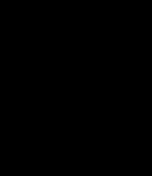

In [41]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow


# Load the image
# Use cv2.imread() with the cv2.IMREAD_UNCHANGED flag
img = cv2.imread('/content/NewVersion/Phy/Img/TESTES-1145-1-eds.tif', cv2.IMREAD_UNCHANGED)

# Check if the image is grayscale and convert to BGR if necessary
if len(img.shape) == 2: #check if the image is grayscale
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR) #convert to BGR


# Convert the image to 8-bit depth if it's not already
if img.dtype != np.uint8:
  img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)


# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Apply thresholding based on hue
lower_bound = np.array([0, 50, 50])
upper_bound = np.array([20, 255, 255])
mask = cv2.inRange(hsv, lower_bound, upper_bound)

# Apply morphological operations
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Find connected components
_, labels = cv2.connectedComponents(mask)

# Extract features and classify
# ... (use machine learning techniques)

# Visualize
segmented_img = cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(segmented_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Tutorial Pillow
https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

# Início do código Pillow

In [ ]:




from PIL import Image  # Importa a biblioteca PIL para manipulação de imagens
import os  # Importa a biblioteca os para interagir com o sistema de arquivos

# Função para obter a cor dominante da imagem
def get_dominant_color(image_path):
    # Abre a imagem no caminho especificado
    with Image.open(image_path) as img:
        img = img.convert("L")  # Converte a imagem para escala de cinza (modo "L")
        # Obtém todas as cores da imagem e suas contagens
        colors = img.getcolors(img.size[0] * img.size[1])
        # Retorna a cor mais frequente (dominante)
        dominant_color = max(colors, key=lambda item: item[0])[1]
        return dominant_color

# Função para criar uma pasta se ela não existir
def create_folder_if_not_exists(folder_path):
    # Verifica se a pasta já existe
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)  # Cria a pasta se não existir

# Função para mover a imagem para uma pasta correspondente à sua cor dominante
def move_image_by_color(image_path, output_folder, dominant_color):
    # O valor dominante é um único valor de intensidade em tons de cinza
    color_folder_name = str(dominant_color)  # Converte o valor da cor dominante para string
    color_folder_path = os.path.join(output_folder, color_folder_name)  # Cria o caminho da nova pasta
    create_folder_if_not_exists(color_folder_path)  # Cria a nova pasta se necessário

    image_name = os.path.basename(image_path)  # Obtém o nome do arquivo da imagem original
    new_image_path = os.path.join(color_folder_path, image_name)  # Define o novo caminho da imagem

    # Abre a imagem novamente para realizar o corte
    with Image.open(image_path) as img:
        width, height = img.size  # Obtém as dimensões da imagem

        # Define as coordenadas do corte (exemplo: cortando a metade da imagem)
        left = 0
        top = 0
        right = width // 2  # Cortando até a metade da largura
        bottom = height // 2  # Cortando até a metade da altura

        # Realiza o corte com as coordenadas definidas
        cropped_image = img.crop((left, top, right, bottom))

        # Salva a imagem cortada na nova pasta correspondente à cor dominante
        cropped_image.save(new_image_path)

# Caminho para as imagens de entrada e a pasta de saída
input_folder = "Phy"  # Pasta onde as imagens estão localizadas
output_folder = "separated_images"  # Pasta onde as imagens cortadas serão salvas

# Loop através de todos os arquivos na pasta de entrada
for filename in os.listdir(input_folder):
    # Verifica se o arquivo tem uma das extensões especificadas (incluindo .tif)
    if filename.endswith((".jpg", ".jpeg", ".png", ".tif")):
        image_path = os.path.join(input_folder, filename)  # Cria o caminho completo do arquivo de imagem
        dominant_color = get_dominant_color(image_path)  # Obtém a cor dominante da imagem
        move_image_by_color(image_path, output_folder, dominant_color)  # Move e corta a imagem pela cor dominante


Pillow